<a href="https://colab.research.google.com/github/JimmyOlsen05/Check-Computer-Performance/blob/master/How%20Various%20Computer%20Metrics%20Affect%20the%20Performance%20of%20Computers%20using%20Multiple%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
from sklearn.inspection import partial_dependence
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [61]:
data=pd.read_csv('performance_data.csv')

In [ ]:
data.head(2)

In [63]:
print(data.columns)


Index(['cpu_percent', 'memory_percent', 'disk_io_counters', 'net_io_counters',
       'graphics_name', 'graphics_ram_size', 'graphics_DeviceID',
       'completion_time'],
      dtype='object')


In [64]:
X.head(3)

,cpu_percent,memory_percent,graphics_ram_size,completion_time,disk_io_read_bytes,disk_io_write_bytes,net_io_bytes_sent,net_io_bytes_recv
0,23.9,95.9,1.000000e+00,1.262159,17523695616,10711587328,21945181,781270113
1,11.5,89.3,1.073742e+09,1.322939,170033679360,51831967744,45297907,327518128
2,7.8,87.9,1.000000e+00,3.052404,14975958016,6321999872,9848370,149783862


In [65]:
# Extract features and add new columns
data['disk_io_read_bytes'] = data.apply(lambda row: extract_disk_io_metric(row, "read"), axis=1)
data['disk_io_write_bytes'] = data.apply(lambda row: extract_disk_io_metric(row, "write"), axis=1)
data['net_io_bytes_sent'] = data.apply(lambda row: extract_net_io_metric(row, "bytes_sent"), axis=1)
data['net_io_bytes_recv'] = data.apply(lambda row: extract_net_io_metric(row, "bytes_recv"), axis=1)

# Drop the original columns
data = data.drop(columns=['disk_io_counters', 'net_io_counters','graphics_name','graphics_DeviceID'])

In [ ]:
# Feature scaling (consider for non-normally distributed data)
scaler = StandardScaler()
X = scaler.fit_transform(data[['cpu_percent', 'memory_percent', 'disk_io_read_bytes', 'disk_io_write_bytes', 'net_io_bytes_sent', 'net_io_bytes_recv', 'graphics_ram_size']])
y = data['completion_time']

data.head(2)

In [67]:
# Train-test split for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Create the linear regression model
model = LinearRegression()



In [69]:
# Fit the model to the training data
model.fit(X_train, y_train)



LinearRegression()

In [70]:
# Make predictions on the test data
y_predicted = model.predict(X_test)

# Evaluate the model performance using R-squared
r2 = r2_score(y_test, y_predicted)
print("R-squared:", r2)

# Print the coefficients of the model
print("Coefficients:", model.coef_)

# Print the intercept of the model
print("Intercept:", model.intercept_)

R-squared: -7.398457335590861e+17
Coefficients: [ 4.91404451e-02  1.44934164e-01  3.51506007e-02 -4.61212165e-02
  4.34207670e-03 -1.69519561e-01 -2.56946763e+07]
Intercept: -5894761.628150324


In [87]:
# Assuming your model is named 'model'
coefficients = model.coef_
feature_names = list(data.columns)[:-1]  # Exclude the dependent variable column

# Sort coefficients by their absolute values in descending order
sorted_importance = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)

# Print the importance of each feature
for name, importance in sorted_importance:
    print(f"Feature: {name}, Importance: {importance:.2f}")  # Format importance to 2 decimal places


Feature: net_io_bytes_sent, Importance: -25694676.31
Feature: disk_io_write_bytes, Importance: -0.17
Feature: memory_percent, Importance: 0.14
Feature: cpu_percent, Importance: 0.05
Feature: completion_time, Importance: -0.05
Feature: graphics_ram_size, Importance: 0.04
Feature: disk_io_read_bytes, Importance: 0.00


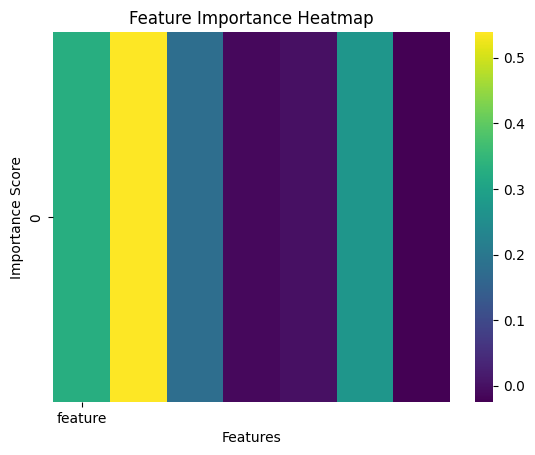

In [95]:
from sklearn.inspection import permutation_importance

# Assuming you have a trained model and features
X_train, X_test, y_train, y_test = train_test_split(X, y)
importance_matrix = permutation_importance(model, X_test, y_test, n_repeats=10)  # Adjust n_repeats if needed

# Create a heatmap (adjust based on your feature names)
feature_cols = list(df.columns)[:-1]  # Exclude dependent variable column
sns.heatmap(importance_matrix.importances_mean.reshape(1, -1), xticklabels=feature_cols, cmap="viridis")  # Adjust colormap as desired

plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance Heatmap")
plt.show()
